# Real World Evidence

# Aims and agenda
* Present overview of Nordic registries and details about available information and how to get access
* Learn new tools to analyse the data 

    

# Agenda


09.30-10.30 Aims and background

10.30-10.40 Break

10.40-12.00 Data access

12.00-12.35 Lunch

12.45-14.00 Data analysis

14.00-14.10 Break

14.15-16.30 Advanced methods



# Agenda


09.30-10.30 Aims and background
-	Why RWD? Pros and Cons of RWD
-	Key data sources, rules and tools to get access
-	Example:  The use of biologics among IBD patients

10.30-10.40 Break

10.40-12.00 Data access
-	Overview of registers and content (Nordic and World)
-	Overview of tools to get and analyse the data
-	Example: Download and structure data on health from statistical agencies

12.00-12.35 Lunch

12.45-14.00 Data analysis
-	Detailed examples of using tools to analyze and visualize the data

14.00-14.10 Break

14.15-15.30 Advanced methods
-	Methods to establish claims about causal effects (of pharmaceuticals) using RWD
-	Conclusion and summing up of key lessons


# Background: Why be interested in real world evidence?

* Three trends
    - Increasing availability of registry data
    - Improved computer capacity to analyze the data
    - New statistical methods reduce problems associated with RWD
    - And increased awareness of problems with evidence from randomized trials


# Example: Is moderate consumption of alcohol good or bad for your health?

# Overview of data sources

* First: Two distinctions
    - Structured vs. Unstructured data sources 
    
    - Open vs. Restricted

* Why distinguish?
    - Reminder that open and unstructured are available and useful






In [1]:
# Example: Is it healthy to go to hospitals?


# Some structured registries

* National Patient Registries
    - All hospital events (see variable list)
* National Prescription registry
* Cause of death registries
* Primary care registries
* Special quality registries
* Large population surveys


# Tools

* Traditionally: Excel!
    - OK, but
        - Problem with very large data
        - Problem with robustness and reproducability
            - Example: Harvard debt study
        - Problem with 
* Other tools
    - SAS, R, Python
    - Open source (R and Python)
    - Powerful, flexible, free
        - "Excel on steroids"
    - Notebook (Jupyter)

# Installation to start analysis
* Download and install python and key packages
    - Go to: https://www.continuum.io/downloads
    - Select Anaconda (for your operating system), download and install
    - After installations, select and start "Jupyter notebook"
    
    


# Key user instructions

* A notebook combines text, code and results
* Use instructions
    - Type code or text in a cell
    - Press SHIFT+ENTER to execute the code in the cell
    - Press TAB to see the methods (commands) available to use on an object
    - Press SHIFT+TAB to get help about a method
    

# Example: Rota virus

* Did the introduction of vaccinations against the rota virus in 2005 and 2015 reduce the number of rota cases?

* Data from the national patient registry

* Simulate individual data
* Provide real aggregate data


In [18]:
#import key packages needed to do the analysis
import pandas as pd
import numpy as np
import seaborn as sns

In [20]:
%matplotlib inline

In [7]:
df = pd.DataFrame()

In [11]:
df['pid'] = np.random.randint(1,10000,10000)
df['age'] = np.random.randint(0,6,10000)
df['month'] = np.random.randint(1,12,10000)
df['year'] = np.random.randint(2000,2017,10000)

In [12]:
df.head()

,pid,age,month,year
0,2727,2,10,2001
1,9351,0,10,2011
2,8582,5,8,2007
3,9217,0,8,2010
4,5725,1,10,2002


In [25]:
# aggregate to month and year
events = df.groupby(['year','month']).size()
events.head()

year  month
2000  1        55
      2        73
      3        58
      4        44
      5        53
dtype: int64

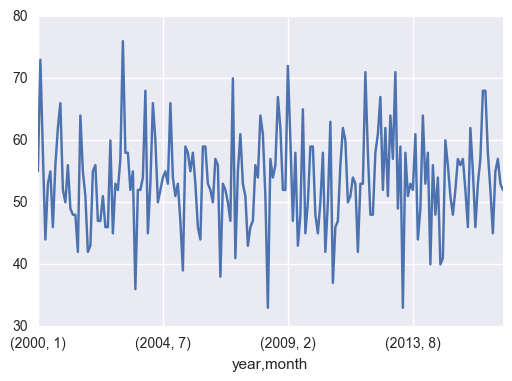

In [29]:
events.plot.line()

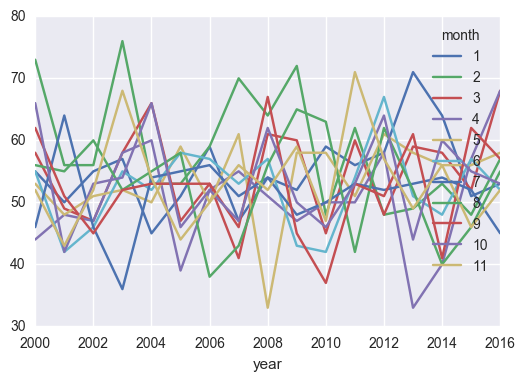

In [31]:
#one line for each month
events.unstack()
events.unstack().plot()

In [35]:
# Get data aggregate data on rotavirus
path="C:/Users/hmelberg_adm/Google Drive/rota/"
file="rota_cases_a08x_alle_ages.xlsx"
df = pd.read_excel(path+file)

In [36]:
df.head()

,year,month,cases_a08x_alle_ages
0,2000,1,259
1,2000,2,273
2,2000,3,366
3,2000,4,392
4,2000,5,250


In [37]:
df.columns

Index(['year', 'month', 'cases_a08x_alle_ages'], dtype='object')

In [38]:
df.columns = ['year', 'month', 'events']

In [39]:
df.head()

,year,month,events
0,2000,1,259
1,2000,2,273
2,2000,3,366
3,2000,4,392
4,2000,5,250


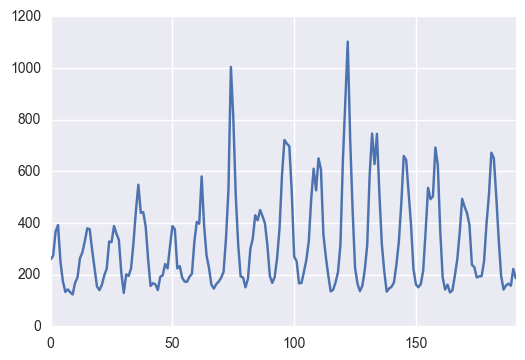

In [40]:
df.events.plot()

In [41]:
df = df.set_index(['year', 'month'])

In [42]:
df.head()

events
year month        
2000 1         259
     2         273
     3         366
     4         392
     5         250

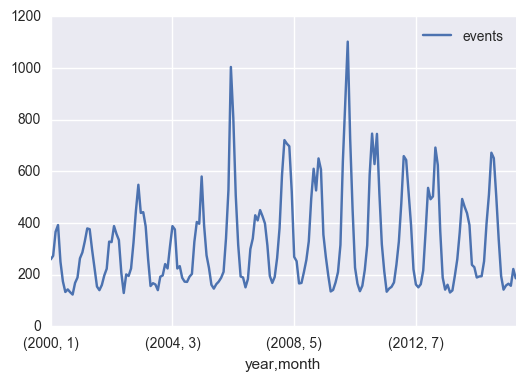

In [43]:
df.plot()

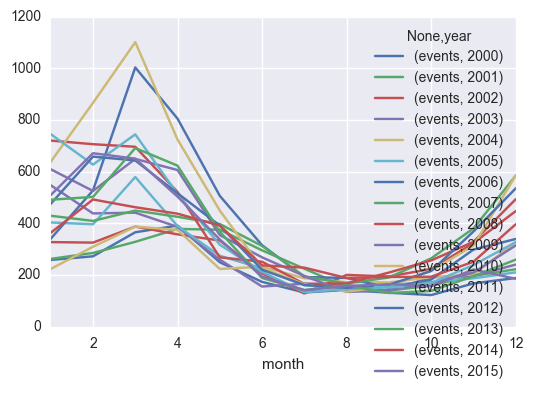

In [45]:
df.unstack('year').plot()